In [225]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler  
from tensorflow.keras.models import Sequential     
from tensorflow.keras.layers import Dense        
from tensorflow.keras.optimizers import Adam  
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import LearningRateScheduler

In [226]:

# Load datasets
market_file = "/kaggle/input/pricesis/alwarprices21-22.csv"
ndvi_file = "/kaggle/input/ndvivalues/Alwar_Mustard_Season_NDVI_2021_2022.csv"

# Read data
market_df = pd.read_csv(market_file)
ndvi_df = pd.read_csv(ndvi_file)

# --- Clean and prepare market data ---
market_df = market_df.rename(columns={
    "Arrivals (Tonnes)": "Arrivals",
    "Modal Price (Rs./Quintal)": "Modal_Price",
    "Reported Date": "Date",
    "Min Price (Rs./Quintal)": "Min_Price",
    "Max Price (Rs./Quintal)": "Max_Price"
})


# Convert date
market_df["Date"] = pd.to_datetime(market_df["Date"], errors="coerce", dayfirst=True)
market_df["Year"] = market_df["Date"].dt.year
market_df["Month"] = market_df["Date"].dt.month

# Assign season for market data (Dec belongs to next year's season)
market_df["Season_Year"] = market_df["Year"]
market_df.loc[market_df["Month"] == 12, "Season_Year"] += 1
market_df["Season"] = (market_df["Season_Year"] - 1).astype(str) + "-" + market_df["Season_Year"].astype(str)


market_df = market_df[["Season","Season_Year","District Name", "Year", "Month", "Arrivals", "Modal_Price", "Date", "Max_Price", "Min_Price"]]

# --- Clean and prepare NDVI data ---
ndvi_df["date"] = pd.to_datetime(ndvi_df["date"])
ndvi_df["Year"] = ndvi_df["date"].dt.year
ndvi_df["Month"] = ndvi_df["date"].dt.month

# Ensure Dec belongs to the correct crop season (Dec 2021 -> Season 2022)
ndvi_df.loc[ndvi_df["Month"] == 12, "Year"] += 1

# Add Season column
ndvi_df["Season"] = (ndvi_df["Year"] - 1).astype(str) + "-" + ndvi_df["Year"].astype(str)

# Pivot NDVI into wide format
ndvi_wide = ndvi_df.pivot_table(index=["Year", "Season"], columns="Month", values="NDVI", aggfunc="mean").reset_index()
ndvi_wide = ndvi_wide.rename(columns={12: "NDVI_Dec", 1: "NDVI_Jan", 2: "NDVI_Feb", 3: "NDVI_Mar"})

# Add derived NDVI metrics
ndvi_wide["NDVI_Diff"] = ndvi_wide["NDVI_Dec"] - ndvi_wide["NDVI_Mar"]
ndvi_wide["NDVI_Max"] = ndvi_wide[["NDVI_Dec", "NDVI_Jan", "NDVI_Feb", "NDVI_Mar"]].max(axis=1)
ndvi_wide["NDVI_Avg"] = (ndvi_wide["NDVI_Dec"] + ndvi_wide["NDVI_Jan"] + ndvi_wide["NDVI_Feb"]+ ndvi_wide["NDVI_Mar"])/4

# --- Merge Market + NDVI ---
final_df = pd.merge(market_df, ndvi_wide, on=["Year", "Season"], how="left")

# Add District column explicitly
final_df = final_df.rename(columns={"District Name": "District"})

# Reorder columns
final_df = final_df[["District","NDVI_Diff", "NDVI_Max","NDVI_Avg","Season","Season_Year","Month","Date","Arrivals", "Min_Price","Max_Price","Modal_Price"]]

# Save merged dataset
final_df.to_csv("Mustard_Merged2.csv", index=False)


# # Show preview
final_df.tail()


/tmp/ipykernel_36/1230878956.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  market_df["Date"] = pd.to_datetime(market_df["Date"], errors="coerce", dayfirst=True)


,District,NDVI_Diff,NDVI_Max,NDVI_Avg,Season,Season_Year,Month,Date,Arrivals,Min_Price,Max_Price,Modal_Price
566,Alwar,0.143797,0.341771,0.29153,2021-2022,2022,3,2022-03-05,190.1,5000,6440,5800
567,Alwar,0.143797,0.341771,0.29153,2021-2022,2022,3,2022-03-10,201.4,5600,6500,6300
568,Alwar,0.143797,0.341771,0.29153,2021-2022,2022,3,2022-03-07,220.5,5400,6150,5800
569,Alwar,0.143797,0.341771,0.29153,2021-2022,2022,3,2022-03-11,240.2,6000,6910,6600
570,Alwar,0.143797,0.341771,0.29153,2021-2022,2022,3,2022-03-09,245.9,5680,6830,6300


In [227]:


# Load datasets
market_file1 = "/kaggle/input/pricesis/bharatpur21-22(in).csv"
ndvi_file1 = "/kaggle/input/ndvivalues/Bharatpur_Mustard_Season_NDVI_2021_2022.csv"

# Read data
market_df1 = pd.read_csv(market_file1)
ndvi_df1 = pd.read_csv(ndvi_file1)

# --- Clean and prepare market data ---
market_df1 = market_df1.rename(columns={
    "Arrivals (Tonnes)": "Arrivals",
    "Modal Price (Rs./Quintal)": "Modal_Price",
    "Reported Date": "Date",
    "Min Price (Rs./Quintal)": "Min_Price",
    "Max Price (Rs./Quintal)": "Max_Price"
})

# Convert date
market_df1["Date"] = pd.to_datetime(market_df1["Date"], errors="coerce", dayfirst=True)
market_df1["Year"] = market_df1["Date"].dt.year
market_df1["Month"] = market_df1["Date"].dt.month

# Assign season for market data (Dec belongs to next year's season)
market_df1["Season_Year"] = market_df1["Year"]
market_df1.loc[market_df1["Month"] == 12, "Season_Year"] += 1
market_df1["Season"] = (market_df1["Season_Year"] - 1).astype(str) + "-" + market_df1["Season_Year"].astype(str)

# Keep only required columns
market_df1 = market_df1[["District Name", "Min_Price", "Max_Price", "Year", "Month", "Season","Season_Year", "Arrivals", "Modal_Price", "Date"]]

# --- Clean and prepare NDVI data ---
ndvi_df1["date"] = pd.to_datetime(ndvi_df1["date"])
ndvi_df1["Year"] = ndvi_df1["date"].dt.year
ndvi_df1["Month"] = ndvi_df1["date"].dt.month

# Ensure Dec belongs to the correct crop season (Dec 2021 -> Season 2022)
ndvi_df1.loc[ndvi_df1["Month"] == 12, "Year"] += 1

# Add Season column
ndvi_df1["Season"] = (ndvi_df1["Year"] - 1).astype(str) + "-" + ndvi_df1["Year"].astype(str)

# Pivot NDVI into wide format
ndvi_wide1 = ndvi_df1.pivot_table(index=["Year", "Season"], columns="Month", values="NDVI", aggfunc="mean").reset_index()
ndvi_wide1 = ndvi_wide1.rename(columns={12: "NDVI_Dec", 1: "NDVI_Jan", 2: "NDVI_Feb", 3: "NDVI_Mar"})

# Add derived NDVI metrics
ndvi_wide1["NDVI_Diff"] = ndvi_wide1["NDVI_Dec"] - ndvi_wide1["NDVI_Mar"]
ndvi_wide1["NDVI_Max"] = ndvi_wide1[["NDVI_Dec", "NDVI_Jan", "NDVI_Feb", "NDVI_Mar"]].max(axis=1)
ndvi_wide1["NDVI_Avg"] = (ndvi_wide1["NDVI_Dec"] + ndvi_wide1["NDVI_Jan"] + ndvi_wide1["NDVI_Feb"]+ ndvi_wide1["NDVI_Mar"])/4
# --- Merge Market + NDVI ---
final_df1 = pd.merge(market_df1, ndvi_wide1, on=["Year", "Season"], how="left")

# Add District column explicitly
final_df1 = final_df1.rename(columns={"District Name": "District"})


# Reorder columns
final_df1 = final_df1[[
    "District","NDVI_Diff", "NDVI_Max","NDVI_Avg","Season","Season_Year","Month","Date","Arrivals", "Min_Price","Max_Price","Modal_Price"
]]

# Save merged dataset
final_df1.to_csv("/kaggle/working/Mustard_Merged1.csv", index=False)

# Show preview
final_df1.head()

/tmp/ipykernel_36/168533567.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  market_df1["Date"] = pd.to_datetime(market_df1["Date"], errors="coerce", dayfirst=True)


,District,NDVI_Diff,NDVI_Max,NDVI_Avg,Season,Season_Year,Month,Date,Arrivals,Min_Price,Max_Price,Modal_Price
0,Bharatpur,0.24897,0.43056,0.341473,2021-2022,2022,7,2022-07-16,12.1,6400,6400,6400
1,Bharatpur,0.24897,0.43056,0.341473,2021-2022,2022,7,2022-07-11,29.3,6297,6446,6400
2,Bharatpur,0.24897,0.43056,0.341473,2021-2022,2022,3,2022-03-01,31.0,6350,6350,6350
3,Bharatpur,0.24897,0.43056,0.341473,2021-2022,2022,7,2022-07-02,31.1,6450,6450,6450
4,Bharatpur,0.24897,0.43056,0.341473,2021-2022,2022,7,2022-07-13,33.4,6102,6846,6400


In [228]:

# Load datasets
market_file2 = "/kaggle/input/pricesis/dhopule21-22(in).csv"
ndvi_file2 = "/kaggle/input/ndvivalues/Dhaulpur_Mustard_Season_NDVI_2021_2022.csv"

# Read data
market_df2 = pd.read_csv(market_file2)
ndvi_df2 = pd.read_csv(ndvi_file2)

# --- Clean and prepare market data ---
market_df2 = market_df2.rename(columns={

    "Arrivals (Tonnes)": "Arrivals",
    "Modal Price (Rs./Quintal)": "Modal_Price",
    "Reported Date": "Date",
    "Min Price (Rs./Quintal)": "Min_Price",
    "Max Price (Rs./Quintal)": "Max_Price"
})

# Convert date
market_df2["Date"] = pd.to_datetime(market_df2["Date"], errors="coerce", dayfirst=True)
market_df2["Year"] = market_df2["Date"].dt.year
market_df2["Month"] = market_df2["Date"].dt.month

# Assign season for market data (Dec belongs to next year's season)
market_df2["Season_Year"] = market_df2["Year"]
market_df2.loc[market_df2["Month"] == 12, "Season_Year"] += 1
market_df2["Season"] = (market_df2["Season_Year"] - 1).astype(str) + "-" + market_df2["Season_Year"].astype(str)

# Keep only required columns
market_df2 = market_df2[["District Name", "Min_Price", "Min_Price", "Year","Season_Year", "Month", "Season", "Arrivals", "Modal_Price", "Date"]]

# --- Clean and prepare NDVI data ---
ndvi_df2["date"] = pd.to_datetime(ndvi_df2["date"])
ndvi_df2["Year"] = ndvi_df2["date"].dt.year
ndvi_df2["Month"] = ndvi_df2["date"].dt.month

# Ensure Dec belongs to the correct crop season (Dec 2021 -> Season 2022)
ndvi_df2.loc[ndvi_df2["Month"] == 12, "Year"] += 1


# Add Season column
ndvi_df2["Season"] = (ndvi_df2["Year"] - 1).astype(str) + "-" + ndvi_df2["Year"].astype(str)

# Pivot NDVI into wide format
ndvi_wide2 = ndvi_df2.pivot_table(index=["Year", "Season"], columns="Month", values="NDVI", aggfunc="mean").reset_index()
ndvi_wide2 = ndvi_wide2.rename(columns={12: "NDVI_Dec", 1: "NDVI_Jan", 2: "NDVI_Feb", 3: "NDVI_Mar"})

# Add derived NDVI metrics
ndvi_wide2["NDVI_Diff"] = ndvi_wide2["NDVI_Dec"] - ndvi_wide2["NDVI_Mar"]
ndvi_wide2["NDVI_Max"] = ndvi_wide2[["NDVI_Dec", "NDVI_Jan", "NDVI_Feb", "NDVI_Mar"]].max(axis=1)
ndvi_wide2["NDVI_Avg"] = (ndvi_wide2["NDVI_Dec"] + ndvi_wide2["NDVI_Jan"] + ndvi_wide2["NDVI_Feb"]+ ndvi_wide2["NDVI_Mar"])/4
# --- Merge Market + NDVI ---
final_df2 = pd.merge(market_df, ndvi_wide2, on=["Year", "Season"], how="left")

# Add District column explicitly
final_df2 = final_df2.rename(columns={"District Name": "District"})

# Reorder columns
final_df2 = final_df2[[
   "District","NDVI_Diff", "NDVI_Max","NDVI_Avg","Season","Season_Year","Month","Date","Arrivals", "Min_Price","Max_Price","Modal_Price"]]

# Save merged dataset
final_df2.to_csv("/kaggle/working/Mustard_Merged3.csv", index=False)

# Show preview
final_df2.head()


/tmp/ipykernel_36/3211575194.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  market_df2["Date"] = pd.to_datetime(market_df2["Date"], errors="coerce", dayfirst=True)


,District,NDVI_Diff,NDVI_Max,NDVI_Avg,Season,Season_Year,Month,Date,Arrivals,Min_Price,Max_Price,Modal_Price
0,Alwar,0.165812,0.329949,0.269249,2021-2022,2022,2,2022-02-26,26.5,5200,7400,6200
1,Alwar,0.165812,0.329949,0.269249,2021-2022,2022,6,2022-06-21,48.9,6200,6700,6475
2,Alwar,0.165812,0.329949,0.269249,2021-2022,2022,7,2022-07-12,52.5,6100,6650,6400
3,Alwar,0.165812,0.329949,0.269249,2021-2022,2022,7,2022-07-13,53.2,6000,6680,6450
4,Alwar,0.165812,0.329949,0.269249,2021-2022,2022,7,2022-07-22,53.7,5900,6555,6350


In [229]:


df1 = pd.read_csv("Mustard_Merged1.csv")
df2 = pd.read_csv("Mustard_Merged2.csv")
df3 = pd.read_csv("Mustard_Merged3.csv")

# Concatenate them (row-wise)
merged_df = pd.concat([df1, df2, df3], ignore_index=True)

# Save merged file
merged_df.to_csv("merged_all.csv", index=False)






merged_df['Arrivals'] = merged_df['Arrivals'].str.replace(',', '', regex=True).astype(float)

file_path = 'merged_all.csv'



df = pd.read_csv(file_path)
df['Arrivals'] = df['Arrivals'].str.replace(',', '', regex=True).astype(float)
print(df.head())

    District  NDVI_Diff  NDVI_Max  NDVI_Avg     Season  Season_Year  Month  \
0  Bharatpur    0.24897   0.43056  0.341473  2021-2022         2022      7   
1  Bharatpur    0.24897   0.43056  0.341473  2021-2022         2022      7   
2  Bharatpur    0.24897   0.43056  0.341473  2021-2022         2022      3   
3  Bharatpur    0.24897   0.43056  0.341473  2021-2022         2022      7   
4  Bharatpur    0.24897   0.43056  0.341473  2021-2022         2022      7   

         Date  Arrivals  Min_Price  Max_Price  Modal_Price  
0  2022-07-16      12.1       6400       6400         6400  
1  2022-07-11      29.3       6297       6446         6400  
2  2022-03-01      31.0       6350       6350         6350  
3  2022-07-02      31.1       6450       6450         6450  
4  2022-07-13      33.4       6102       6846         6400  


In [247]:
 df["Price_Spread"] = df["Max_Price"] - df["Min_Price"]
 df['Price_Midpoint'] = (df['Max_Price'] + df['Min_Price']) / 2
 df["NDVI_Diff"] = df["NDVI_Diff"].apply(lambda x: round(x, 3))
 df["NDVI_Max"] = df["NDVI_Max"].apply(lambda x: round(x, 3))
 df["NDVI_Avg"] = df["NDVI_Avg"].apply(lambda x: round(x, 3))

# Features and target
X = df.drop(columns=["Modal_Price"])
y = df["Modal_Price"]

# Column types
categorical = ["District","Season"]
numeric = [  "NDVI_Avg", "Arrivals", "Min_Price", "Max_Price","Month","Season_Year","Price_Spread","NDVI_Diff","NDVI_Max",'Price_Midpoint']

# Preprocessing: OneHot for categorical, StandardScaler for numeric
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
    ("num", StandardScaler(), numeric)
])

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


# Neural Network model
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)  # Regression output
])
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)


# Compile model
model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

from tensorflow.keras import callbacks

# ... (your model definition and data preparation code)

# Define the learning rate scheduler
from tensorflow.keras import callbacks

# Define the learning rate scheduler

early_stop = callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)



#Callbacks (EarlyStopping)


# Train
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Predictions
y_pred = model.predict(X_test).flatten()

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f" MSE: {mse:.2f}")
print(f" RMSE: {rmse:.2f}")
print(f" R² Score: {r2:.4f}")


Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 41993944.0000 - mae: 6476.2842 - val_loss: 42042972.0000 - val_mae: 6480.1357
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 41826136.0000 - mae: 6463.4487 - val_loss: 41381996.0000 - val_mae: 6429.1230
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 41063996.0000 - mae: 6403.8179 - val_loss: 38525644.0000 - val_mae: 6203.6406
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36929420.0000 - mae: 6071.0156 - val_loss: 30136708.0000 - val_mae: 5485.4863
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26573488.0000 - mae: 5134.0957 - val_loss: 14526782.0000 - val_mae: 3787.9297
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10676214.0000 - mae: 3152.7605 - val_loss: 1946070.8750 - val_mae: 1275.1604
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1465307.2500 - mae: 983.8718 - val_loss: 476193.8750 - val_mae: 445.0102
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/

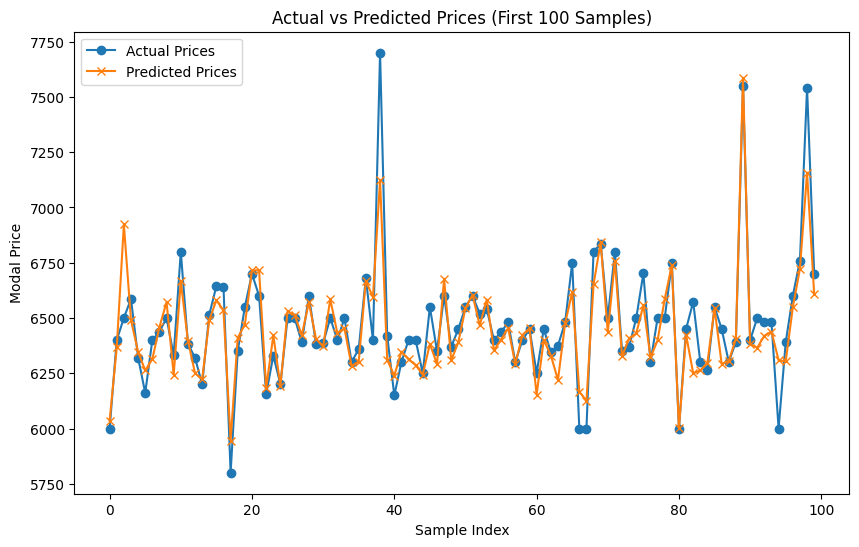

In [251]:
import matplotlib.pyplot as plt


# Line plot: Trend comparison
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label="Actual Prices", marker="o")
plt.plot(y_pred[:100], label="Predicted Prices", marker="x")
plt.xlabel("Sample Index")
plt.ylabel("Modal Price")
plt.title("Actual vs Predicted Prices (First 100 Samples)")
plt.legend()
plt.show()


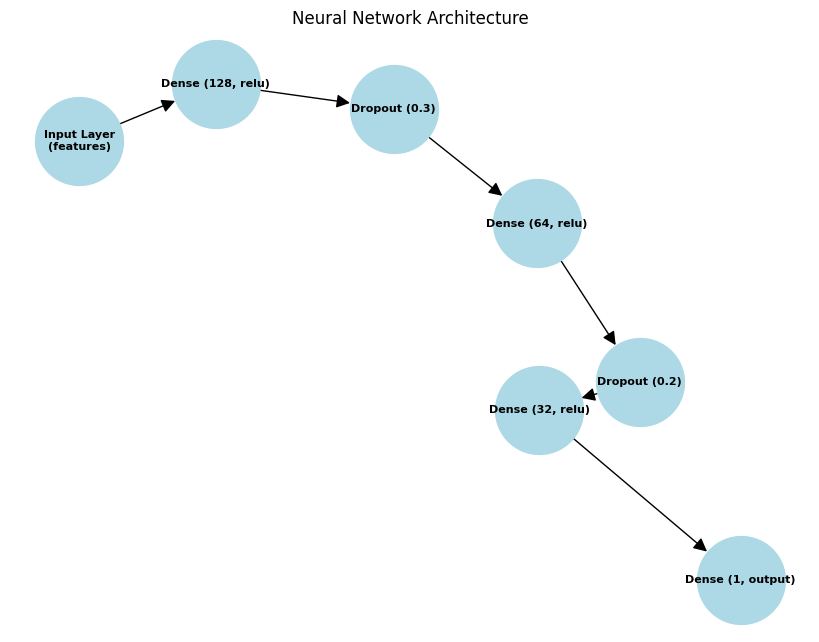

In [249]:
import matplotlib.pyplot as plt
import networkx as nx

# Define model layers
layers = [
    "Input Layer\n(features)",
    "Dense (128, relu)",
    "Dropout (0.3)",
    "Dense (64, relu)",
    "Dropout (0.2)",
    "Dense (32, relu)",
    "Dense (1, output)"
]

# Build graph
G = nx.DiGraph()
for i in range(len(layers) - 1):
    G.add_edge(layers[i], layers[i+1])

# Draw graph
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, seed=42)  # layout for graph
nx.draw(G, pos, with_labels=True, node_size=4000, node_color="lightblue", 
        font_size=8, font_weight="bold", arrowsize=20)
plt.title("Neural Network Architecture", fontsize=12)
plt.show()
